In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,20)

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


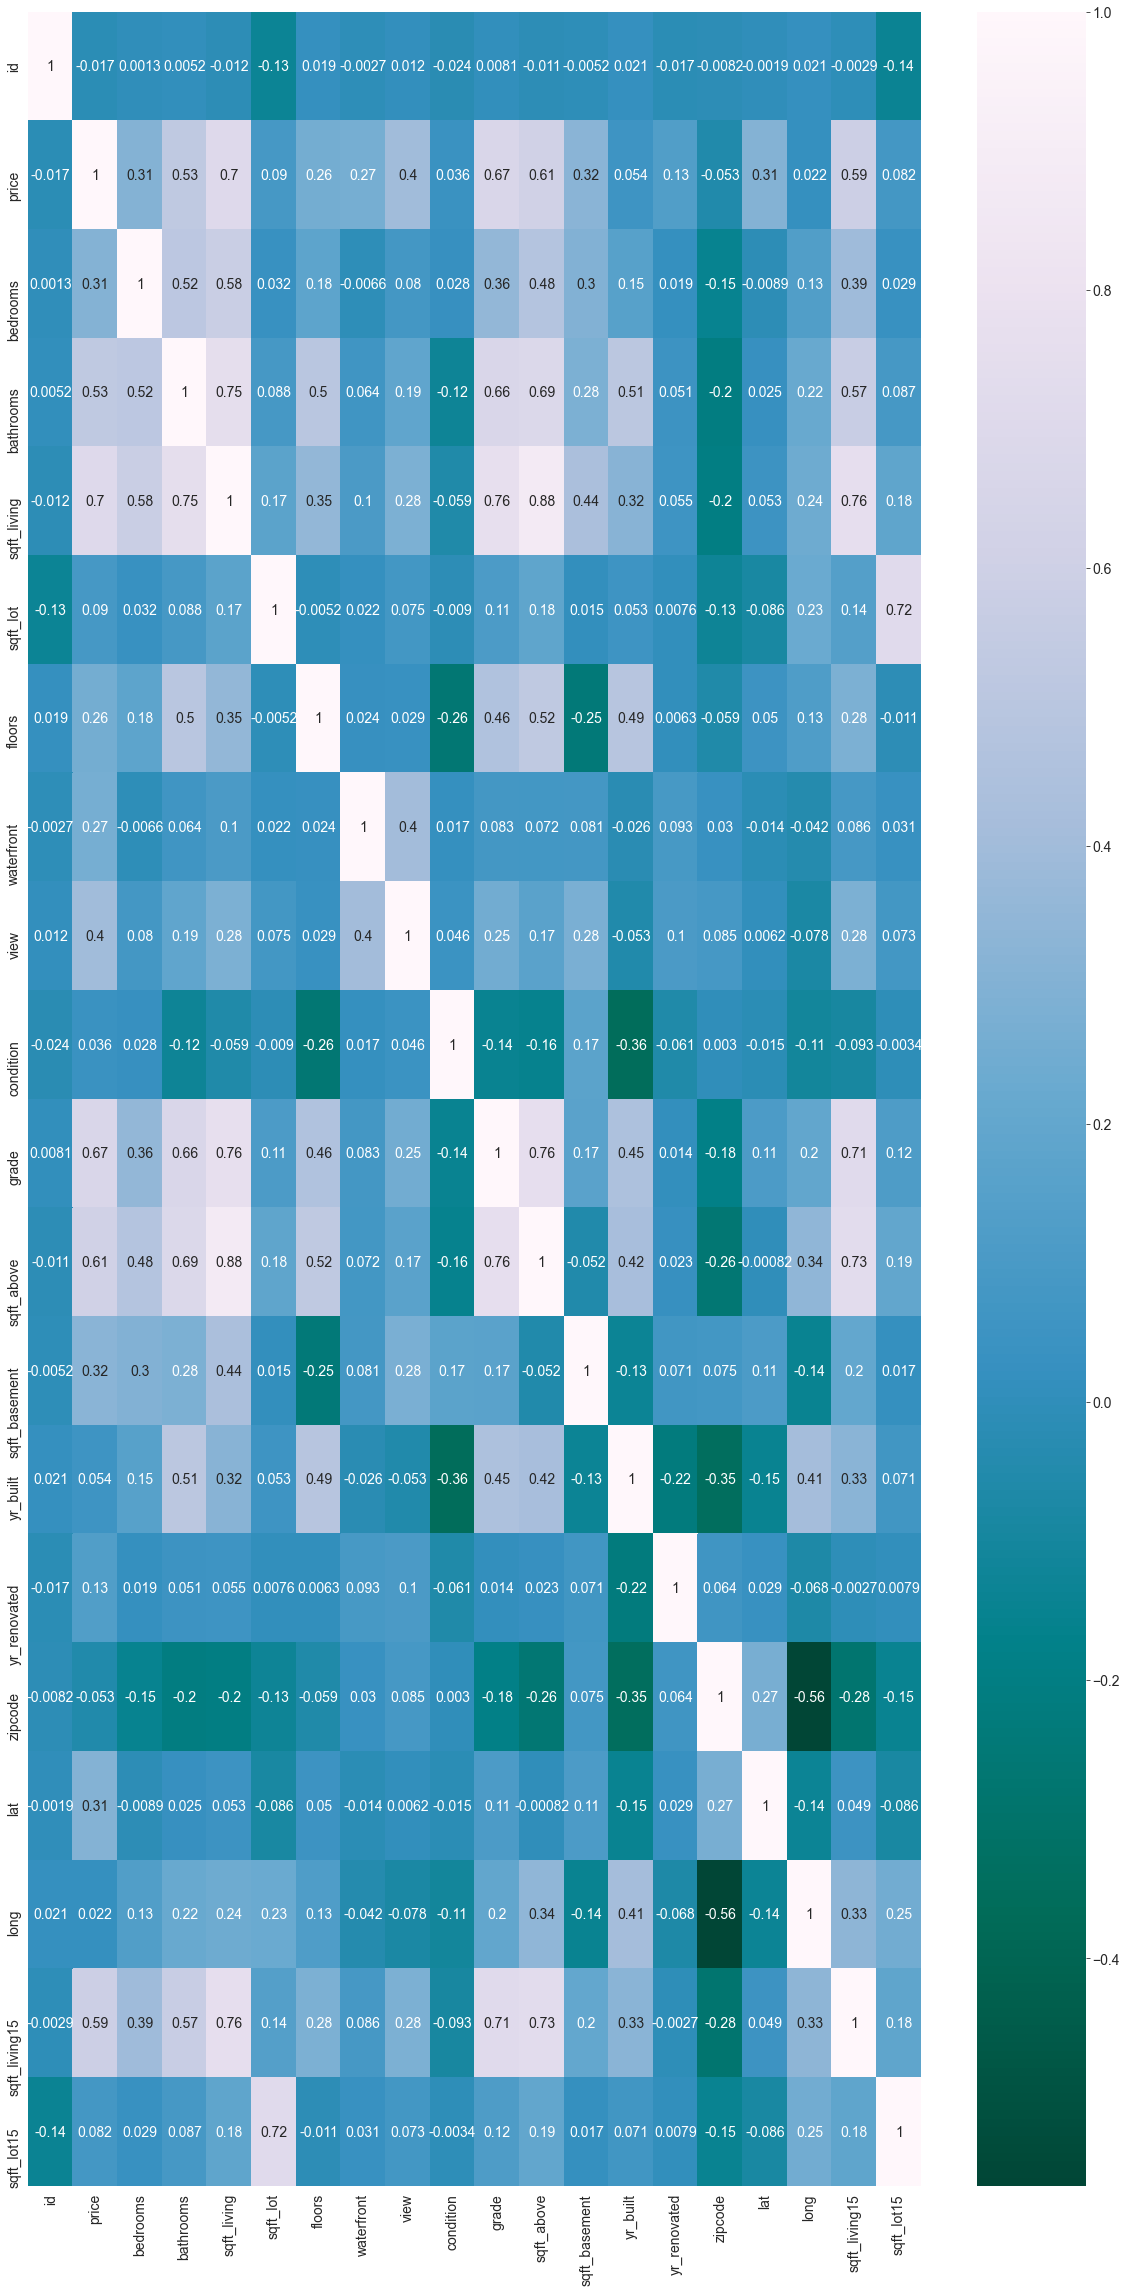

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,40))
sns.heatmap(data.corr(), annot = True, cmap = 'PuBuGn_r')
plt.show()

### visualization


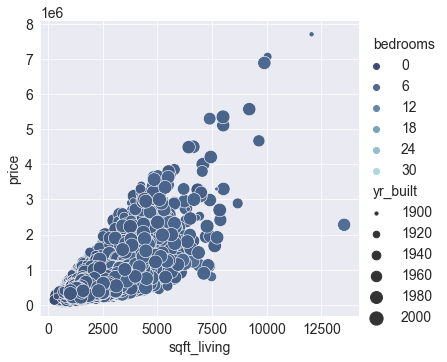

In [8]:
# graph for price vs sq.ft
sns.relplot(data = data, x='sqft_living',y='price', hue = 'bedrooms',size = 'yr_built' ,palette =  'ch: r=-.2, d= .3_r',
           sizes = (10,200))
plt.show()

<Figure size 720x1440 with 0 Axes>

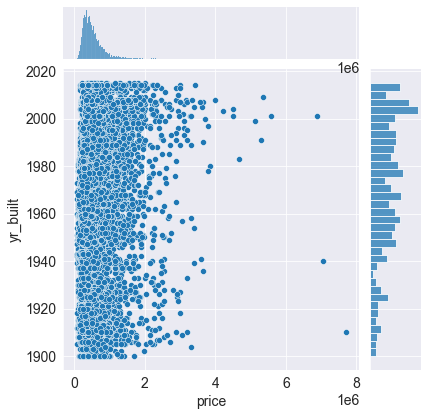

In [9]:
plt.figure(figsize= (10,20))
sns.jointplot(x='price',y='yr_built',data= data)
plt.show();

In [10]:
data['date'].nunique()

372

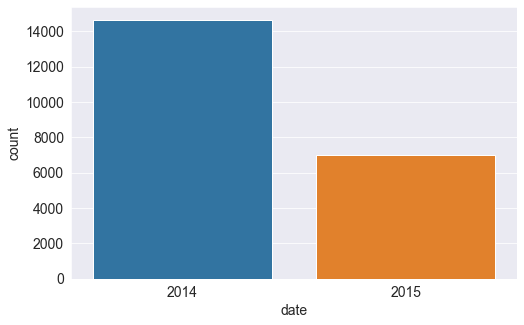

In [11]:
year = pd.to_datetime(data.date).dt.year

plt.figure(figsize = (8,5))
sns.countplot(x =pd.to_datetime(data.date).dt.year);

In [12]:
from sklearn.model_selection import train_test_split


train_val_df,  test_df = train_test_split(data, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [13]:
print('Train data shape: ', train_df.shape)
print('Validation data shape: ', val_df.shape)
print('Test data shape: ',test_df.shape)

Train data shape:  (12967, 21)
Validation data shape:  (4323, 21)
Test data shape:  (4323, 21)


In [14]:
data.shape

(21613, 21)

In [15]:
input_cols = list(train_df.columns)[3:-1]
output_cols = 'price'

In [16]:
input_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15']

In [17]:
output_cols

'price'

In [18]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[output_cols].copy()

test_inputs = test_df[input_cols].copy
test_targets = test_df[input_cols].copy

val_inputs = val_df[input_cols].copy()
val_targets = val_df[output_cols].copy()


In [19]:
train_inputs.shape

(12967, 17)

In [20]:

numeric_cols =train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [21]:
numeric_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15']

In [22]:
## there is no usefull categorical columns in the dataset
categorical_cols

[]

In [23]:
# so no need of imputation
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [24]:
train_inputs[numeric_cols]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
295,4,2.50,3360,22111,2.0,0,0,3,10,3360,0,1994,0,98075,47.5951,-122.017,3150
13013,2,1.00,720,6400,1.0,0,0,4,6,720,0,1943,0,98126,47.5286,-122.368,1030
6962,3,3.25,3690,7200,2.0,0,0,3,11,3690,0,2007,0,98033,47.6815,-122.200,1880
4249,4,2.75,3190,5408,2.0,0,0,3,9,3190,0,2005,0,98075,47.5903,-121.988,3160
8903,4,2.50,2860,5576,2.0,0,0,3,8,2860,0,2004,0,98028,47.7450,-122.224,2290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,4,1.75,1680,19405,1.0,0,0,4,7,1560,120,1959,0,98055,47.4552,-122.202,2000
20832,3,3.00,1730,1442,2.0,0,0,3,8,1440,290,2008,0,98106,47.5344,-122.348,1370
6189,5,2.75,3360,9200,2.0,0,0,3,9,3360,0,2014,0,98011,47.7754,-122.173,3360
5106,3,1.75,1560,7245,1.5,0,0,3,7,1560,0,1962,1985,98052,47.6868,-122.119,2220


In [ ]:
# model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', max_iter= 100, tol = 0.0001)

In [ ]:
model.fit(train_inputs[numeric_cols], train_targets)

In [ ]:
print('Model coefficient : ', model.coef_)
print('Model Intercepts : ', model.intercept_)

In [ ]:
weight_df= pd.DataFrame ({
    'feature': numeric_cols,
    'weights': model.coef_.tolist()[0]
})

In [ ]:
weight_df

In [ ]:
plt.figure(figsize = (10,20))
sns.barplot(data = weight_df.head(15), x='feature',y = 'weights')

In [ ]:
X_train = train_df[numeric_cols]
X_test = test_df[numeric_cols]
X_val = val_df[numeric_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

In [ ]:
train_targets

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(train_targets, train_preds, normalize = 'true')
print('Confusion Matrix: ', cf)


In [ ]:
sns.heatmap(cf, annot= True)
plt.title('Training Confusion Matrix')

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(train_preds, train_targets)
score

In [ ]:
cf_test = confusion_matrix(test_targets, test_preds, normalize = 'true')
cf_test

In [ ]:
sns.heatmap(cf_test, annot = True)
plt.title('Test Confusion Matrix')

In [ ]:
def predict_input(input_data):
    input_df = pd.DataFrame([input_data])
    X_input= input_data[numeric_cols]
    pred = model.pred(X_input)[0]
    pred_probability = model.pred_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, pred_probability
    

In [ ]:
from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(n_estimator = 300, max_depth = 5,
                                         min_samples_split = 2, learning_rate = 0.1, loss = 'ls')

In [ ]:
clf.fit(train_inputs[numeric_cols], train_targets)

In [ ]:
clf.score(X_train, X_test)